<a href="https://colab.research.google.com/github/Arslonbekjon/Deep-learning/blob/main/DL_Loyiha_1_qism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import fastai


# Dataset

In [ ]:
#!git clone https://github.com/EscVM/OIDv4_Toolkit.git
#!cd OIDv4_Toolkit && pip install -r requirements.txt

In [4]:
!cd OIDv4_Toolkit && python3 main.py downloader --Dataset /content --classes Dolphin Harbor_seal --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Dolphin.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 41552 KB/s, 0 seconds passed
[DOWNLOAD] | File 

# Model

In [5]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path = Path('train')
#fls = get_image_files(path)
#failed = verify_images(path)


#Datablock

transports = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items= get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

#Dataloader yaratamiz
dls= transports.dataloaders(path)

# o'qitish (train)
learn = cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,0.926343,0.356615,0.850000,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.268321,0.125811,0.950000,00:10
1,0.160896,0.147404,0.950000,00:10
2,0.121116,0.145348,0.962500,00:09
3,0.091543,0.132879,0.962500,00:10


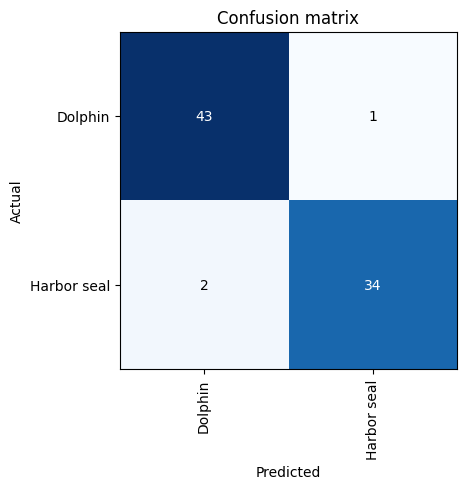

In [6]:
#tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

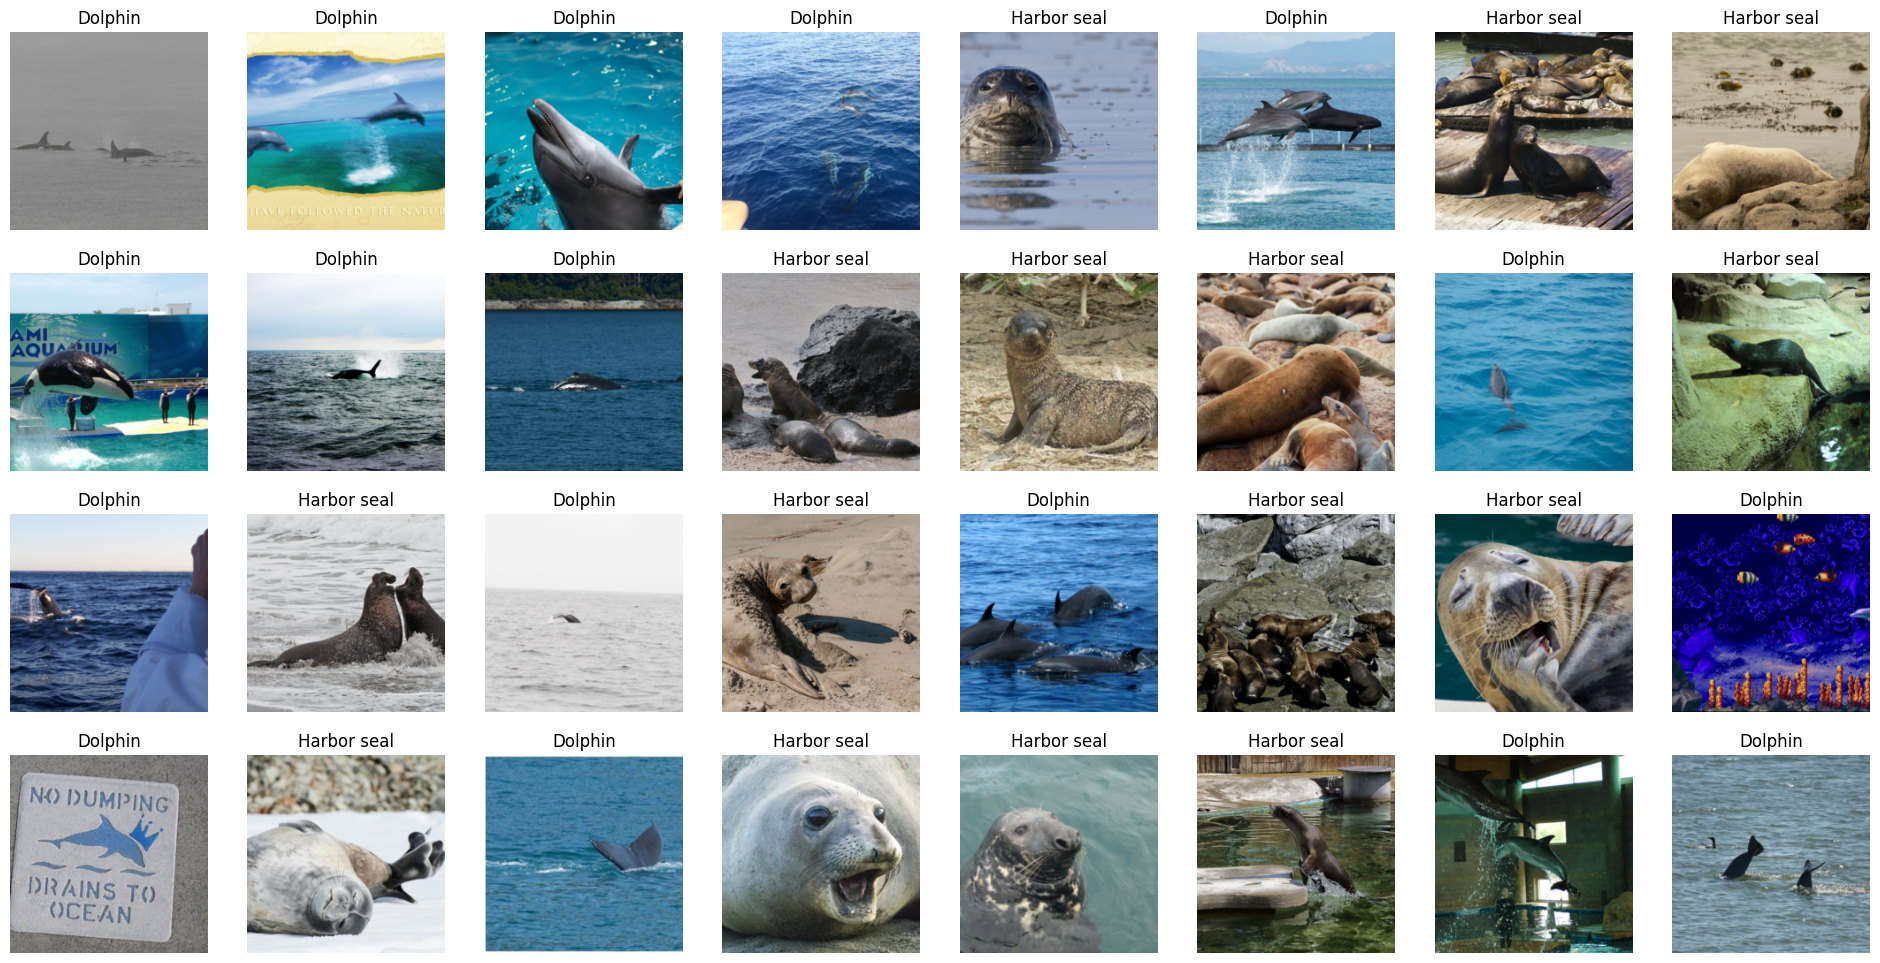

In [7]:
#datasetni tekshirish
dls.train.show_batch(max_n=32,nrows=4)

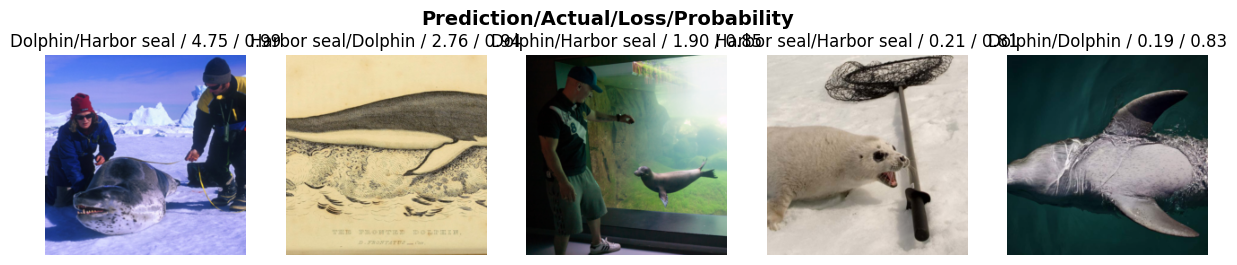

In [8]:
interp.plot_top_losses(5,nrows=1)

# Modelni tekshirib ko'ramiz

In [9]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:Dolphin
Ehtimollik:0.7880759239196777


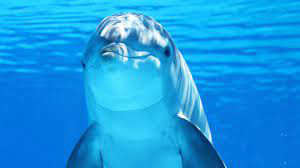

In [12]:
img = PILImage.create(upload.data[-1])
pred,pred_id,probs = learn.predict(img)
print(f'Bashorat:{pred}')
print(f'Ehtimollik:{probs[pred_id]}')
img